In [31]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt


In [33]:

# Load the dataset
df = pd.read_csv('Automobile.csv')

# Check the first few rows and dataset info
print(df.head())
print(df.info())

                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         304.0       150.0   
4                ford torino  17.0          8         302.0       140.0   

   weight  acceleration  model_year origin  
0    3504          12.0          70    usa  
1    3693          11.5          70    usa  
2    3436          11.0          70    usa  
3    3433          12.0          70    usa  
4    3449          10.5          70    usa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2 

In [35]:
df['origin'] = df['origin'].astype(str)
df['cylinders'] = df['cylinders'].astype(str)
df['model_year'] = df['model_year'].astype(str)

# Create a list of transactions (each row represents a transaction)
transactions = df[['origin', 'cylinders', 'model_year']].values.tolist()

# Initialize the TransactionEncoder
te = TransactionEncoder()

# Transform the transactions into a one-hot encoded boolean matrix
te_ary = te.fit(transactions).transform(transactions)

# Convert the boolean matrix into a DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Now, let's apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the first few rules
print(rules.head())



  antecedents consequents  antecedent support  consequent support   support  \
0        (80)         (4)            0.072864            0.512563  0.062814   
1         (4)        (80)            0.512563            0.072864  0.062814   
2        (81)         (4)            0.072864            0.512563  0.052764   
3         (4)        (81)            0.512563            0.072864  0.052764   
4        (82)         (4)            0.077889            0.512563  0.070352   

   confidence      lift  representativity  leverage  conviction  \
0    0.862069  1.681880               1.0  0.025467    3.533920   
1    0.122549  1.681880               1.0  0.025467    1.056624   
2    0.724138  1.412779               1.0  0.015416    1.766960   
3    0.102941  1.412779               1.0  0.015416    1.033528   
4    0.903226  1.762176               1.0  0.030429    5.036851   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.437290  0.120192   0.717028    0.492309  
1       0.831753  

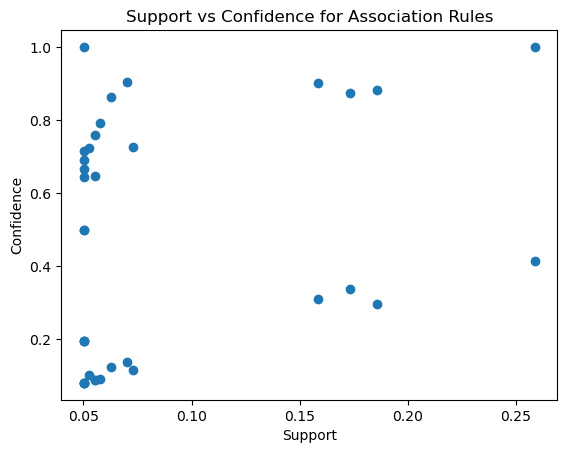

In [37]:
# Optional: Visualize the support vs confidence for the rules
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence for Association Rules')
plt.show()

In [38]:

# Run Apriori to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate rules with confidence ≥ 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

# Display the rules
print(rules)


  antecedents consequents  antecedent support  consequent support   support  \
0    (europe)         (4)            0.175879            0.512563  0.158291   
1     (japan)         (4)            0.198492            0.512563  0.173367   
2         (6)       (usa)            0.211055            0.625628  0.185930   
3         (8)       (usa)            0.258794            0.625628  0.258794   
4       (usa)         (8)            0.625628            0.258794  0.258794   

   confidence      lift  representativity  leverage  conviction  \
0    0.900000  1.755882               1.0  0.068142    4.874372   
1    0.873418  1.704021               1.0  0.071627    3.850754   
2    0.880952  1.408109               1.0  0.053888    3.144724   
3    1.000000  1.598394               1.0  0.096885         inf   
4    0.413655  1.598394               1.0  0.096885    1.264112   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.522358  0.298578   0.794845    0.604412  
1       0.515470  

In [41]:
# 6. Display Results
print("\nFrequent Itemsets:")
print(frequent_itemsets)




Frequent Itemsets:
     support     itemsets
0   0.512563          (4)
1   0.211055          (6)
2   0.100503         (73)
3   0.258794          (8)
4   0.175879     (europe)
5   0.198492      (japan)
6   0.625628        (usa)
7   0.158291  (europe, 4)
8   0.173367   (japan, 4)
9   0.180905     (usa, 4)
10  0.185930     (6, usa)
11  0.258794     (8, usa)


In [43]:
print("\nAssociation Rules:")
print(rules)




Association Rules:
  antecedents consequents  antecedent support  consequent support   support  \
0    (europe)         (4)            0.175879            0.512563  0.158291   
1     (japan)         (4)            0.198492            0.512563  0.173367   
2         (6)       (usa)            0.211055            0.625628  0.185930   
3         (8)       (usa)            0.258794            0.625628  0.258794   
4       (usa)         (8)            0.625628            0.258794  0.258794   

   confidence      lift  representativity  leverage  conviction  \
0    0.900000  1.755882               1.0  0.068142    4.874372   
1    0.873418  1.704021               1.0  0.071627    3.850754   
2    0.880952  1.408109               1.0  0.053888    3.144724   
3    1.000000  1.598394               1.0  0.096885         inf   
4    0.413655  1.598394               1.0  0.096885    1.264112   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.522358  0.298578   0.794845    0.604412 

In [45]:
# 7. Example filtering rules.
print("\nRules with high confidence:")
print(rules[rules['confidence'] >= 0.5]) #example filter



Rules with high confidence:
  antecedents consequents  antecedent support  consequent support   support  \
0    (europe)         (4)            0.175879            0.512563  0.158291   
1     (japan)         (4)            0.198492            0.512563  0.173367   
2         (6)       (usa)            0.211055            0.625628  0.185930   
3         (8)       (usa)            0.258794            0.625628  0.258794   

   confidence      lift  representativity  leverage  conviction  \
0    0.900000  1.755882               1.0  0.068142    4.874372   
1    0.873418  1.704021               1.0  0.071627    3.850754   
2    0.880952  1.408109               1.0  0.053888    3.144724   
3    1.000000  1.598394               1.0  0.096885         inf   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.522358  0.298578   0.794845    0.604412  
1       0.515470  0.322430   0.740311    0.605827  
2       0.367361  0.285714   0.682007    0.589071  
3       0.505085  0.413655   1.

In [47]:
print("\nRules sorted by lift:")
print(rules.sort_values(by="lift", ascending=False).head(10)) #example sort


Rules sorted by lift:
  antecedents consequents  antecedent support  consequent support   support  \
0    (europe)         (4)            0.175879            0.512563  0.158291   
1     (japan)         (4)            0.198492            0.512563  0.173367   
3         (8)       (usa)            0.258794            0.625628  0.258794   
4       (usa)         (8)            0.625628            0.258794  0.258794   
2         (6)       (usa)            0.211055            0.625628  0.185930   

   confidence      lift  representativity  leverage  conviction  \
0    0.900000  1.755882               1.0  0.068142    4.874372   
1    0.873418  1.704021               1.0  0.071627    3.850754   
3    1.000000  1.598394               1.0  0.096885         inf   
4    0.413655  1.598394               1.0  0.096885    1.264112   
2    0.880952  1.408109               1.0  0.053888    3.144724   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.522358  0.298578   0.794845    0.6044

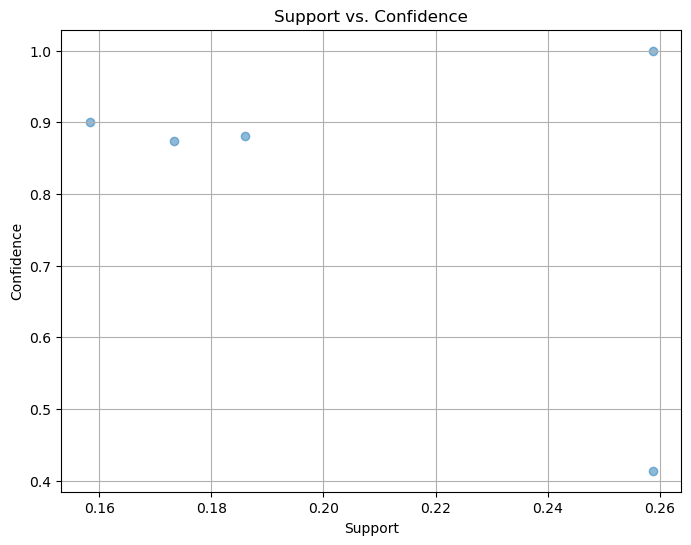

In [49]:
# 5. Visualization: Scatter plot of support vs. confidence
def plot_scatter_support_confidence(rules):

    plt.figure(figsize=(8, 6))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs. Confidence')
    plt.grid(True)
    plt.show()

plot_scatter_support_confidence(rules)

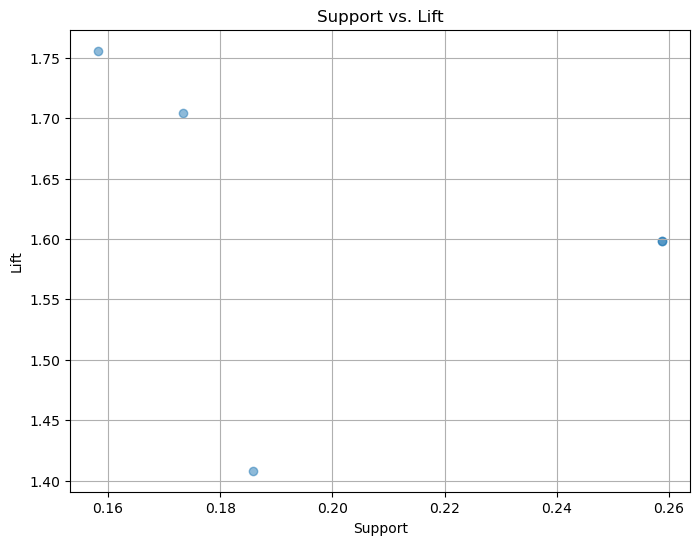

In [51]:
# 6. Visualization: Scatter plot of support vs. lift
def plot_scatter_support_lift(rules):
    """Plots a scatter plot of support vs. lift."""
    plt.figure(figsize=(8, 6))
    plt.scatter(rules['support'], rules['lift'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Lift')
    plt.title('Support vs. Lift')
    plt.grid(True)
    plt.show()

plot_scatter_support_lift(rules)